<h1><center>XYZ Product - SN_Marketing</center></h1>

<center><img src="https://images.unsplash.com/photo-1533895328642-8035bacd565a?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80" alt="Facebook tracking You" title="Facebook Tracking You"  style="object-fit:cover; width:800px; height:250px;"/></center>

> __*Created by Charley lebarbier*__

## Objectives :  
*As an AI Developer, a site comes to you with a problem to know if the poster of an advertisement of a product XYZ has the* *chance or not to attract the user and subsequently lead to an order by the latter. For this purpose, a dataset was created* *containing users with their characteristics and a purchased column indicating whether the user ordered this product or not.*
*With the help of streamlit, scikit-learn and pandas, create an application that predicts whether the product will be ordered by the user based on the user's characteristics.*

## Others :
*- The data has been analyzed and there is a trace of this analysis in a jupyter-notebook*
*- The realized application works without bugs, and classifies precisely the data entered by the user*

=>  
*- A github with streamlit app, data and notebook*

____________________________________
____________________________________

<center><h2>EDA - Exploratory Data Analysis</h2></center>

#### Working Environnement Preparation

In [1]:
# Import Libraries
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from numpy import mean
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
# Import dataset in a variable
dataset = pd.read_csv('data/Social_Network_Ads.xls')

# Check the import
dataset.head()
# dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Get informations about our dataset

In [3]:
# Get information and description about our dataset

dataset.info()           # give infos about the types of each cols
dataset.describe()       # give infos about the stats of our datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
# Check if missing value

dataset.isnull().values.any()   # True / False : give a fast answer
#dataset.isnull().sum()       # Low -> cause calcul each value, give where data is missing

False

#### EDA : Asking Analytical Questions and Visualizations

In [5]:
# Drop the ID column, not relevant here for ML
df_copy = dataset.drop(['User ID'], axis=1)
#df_copy.head()
df_copy.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


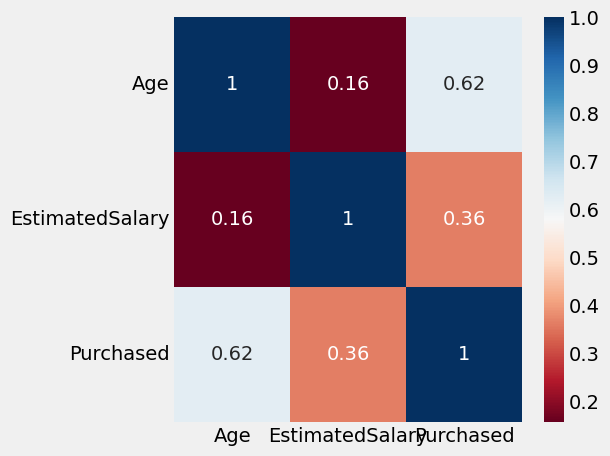

In [6]:
# First of all, look the correlation
# Display a heatmap plot

sns.heatmap(df_copy.corr(), cbar=True, annot=True, cmap='RdBu');

fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

__Conclusion about Heatmap :__

- __Positive(s) Correlation :__  
    - *Age / Purchase*  
</br>  
- __Negative(s) Correlation :__  
    - *Age / Estimated Salary*


#### Analysis : Age / Purchase 

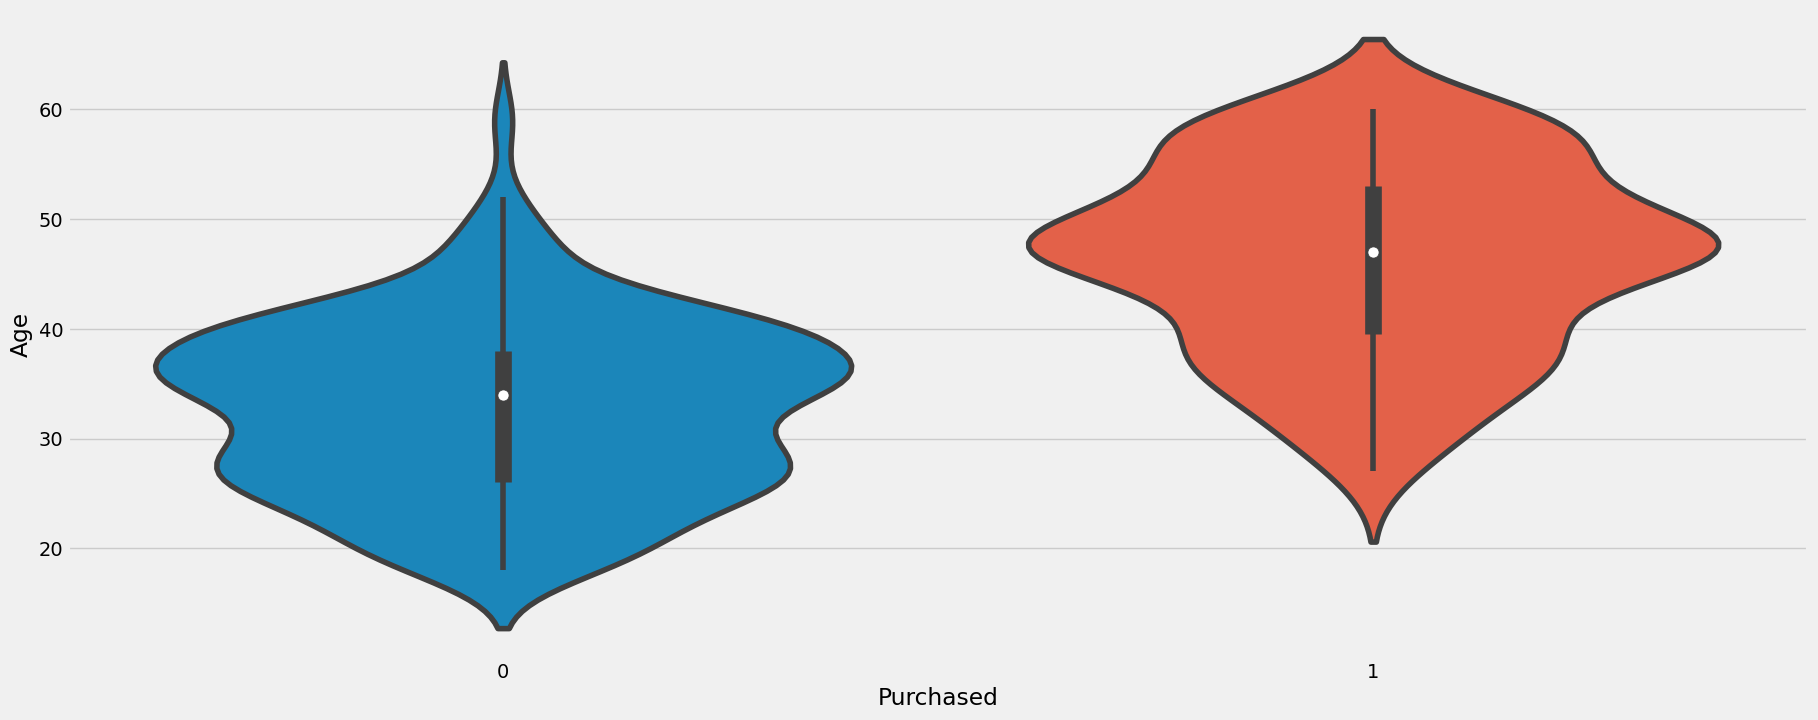

In [7]:
sns.violinplot(data=df_copy, x='Purchased', y='Age')

fig = plt.gcf()
fig.set_size_inches(20,8)
plt.show()

In [8]:
df_copy.groupby('Purchased')['Age'].mean()

Purchased
0    32.793774
1    46.391608
Name: Age, dtype: float64

__Conclusion :__

Les personnes ayant entre 10 et 42 ans sont les moins susceptibles d'acheter, là où les personnes de plus de 42 ans le sont plus.

- Moyenne non acheteur : 33 ans 
- Moyenne acheteur : 46 ans

#### Analysis : Age / Estimated Salary based on Purchased

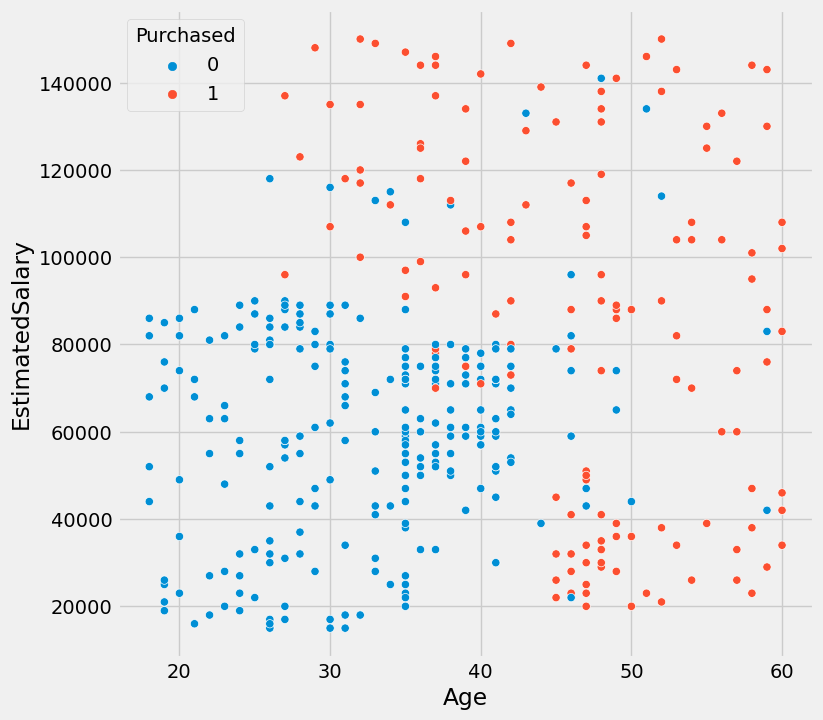

In [92]:
sns.scatterplot(data=df_copy, x='Age', y='EstimatedSalary', hue='Purchased');

fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.show()

In [10]:
df_copy.groupby('Purchased')['EstimatedSalary'].mean()

Purchased
0    60544.747082
1    86272.727273
Name: EstimatedSalary, dtype: float64

__Conclusion :__

- Le graphique corrobore notre première analyse selon laquelle la tranche d'âge 18 - 42 ans ne sont pas la cible qui achètent le produit, tandis que la tranche d'âge > à 42 ans achétent le produit.

- Le salaire des acheteurs est compris entre 20K et +140K, avec une moyenne autour de 86K

#### Gender Analysis

In [11]:
le = LabelEncoder()
df_copy.Gender = le.fit_transform(df_copy.Gender)

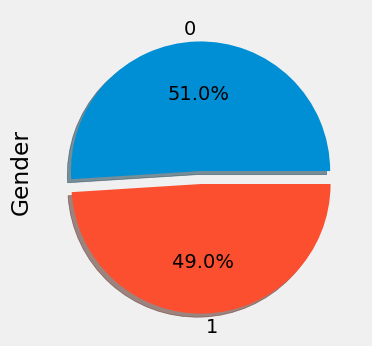

In [12]:
df_copy['Gender'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', shadow = True)

fig = plt.gcf()
fig.set_size_inches(4,4)
plt.show()

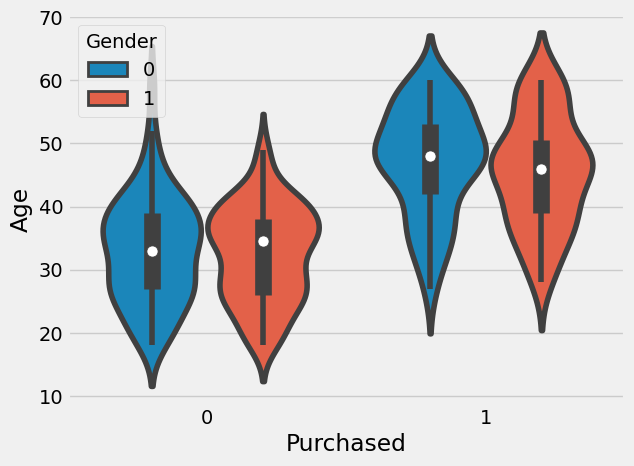

In [13]:
sns.violinplot(data=df_copy, x='Purchased', y='Age', hue='Gender');

fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [14]:
df_buy = df_copy.loc[df_copy['Purchased'] == 1]
# df_not_buy = df_copy.loc[df_copy['Purchased'] == 0]   # <- pas intéressant ici

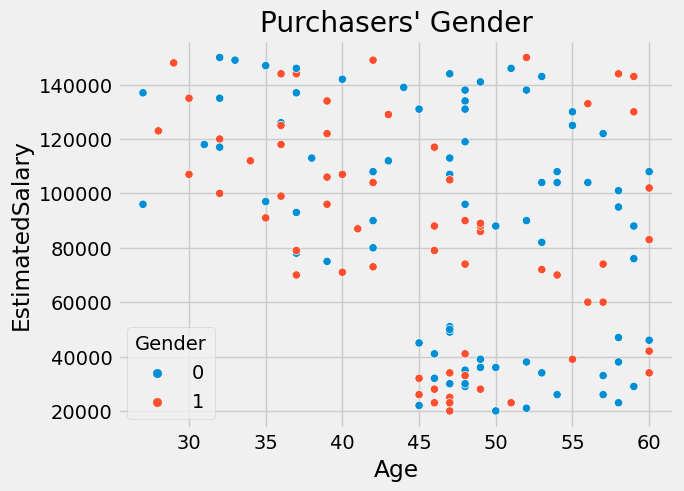

In [31]:
sns.scatterplot(data=df_buy, x='Age', y='EstimatedSalary', hue='Gender');
plt.title("Purchasers' Gender")
plt.show()

In [16]:
df_buy.Gender = le.fit_transform(df_buy.Gender)
df_buy.groupby('Gender')['Age'].mean()

Gender
0    47.155844
1    45.500000
Name: Age, dtype: float64

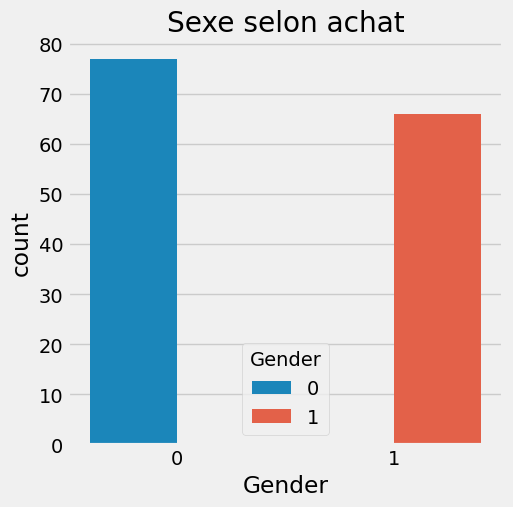

In [17]:
sns.countplot(data=df_buy, x='Gender', hue='Gender');
plt.title("Sexe selon achat")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

__Conclusion :__

On peut voir que les femmes achètent plus que les hommes.

En comparant avec le graph Achat / Purchased, on note des outliers qui apparaissent entre la tranche d'âge 35-42 ans et un salaire compris entre 65 et 79K.

________________________________
#### Major Conclusions about EDA

- Les femmes achètent plus que les hommes
- Le salaire moyen des acheteurs est de 86K
- La tranche d'âge est comprise entre 45 et 60 ans 
- ou un salaire débutant à 80K

____________________________________
____________________________________

<center><h2>Machine Learning</h2></center>

In [18]:
# Convert Female / Male
df_copy.Gender = le.fit_transform(df_copy.Gender)

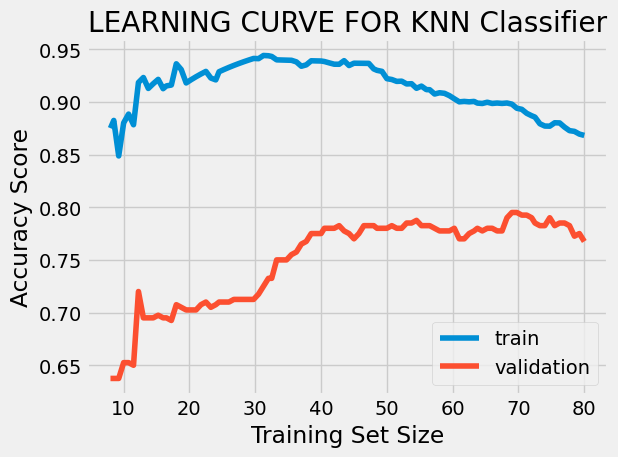

In [19]:
# Affiche la meilleur répartition pour la découpe du jeu de données
# Séparation valeurs et resultats

feature_columns = ['Gender','Age','EstimatedSalary']
x = df_copy[feature_columns].values
y = df_copy['Purchased'].values

knn = KNeighborsClassifier()

N, train_score, val_score = learning_curve(knn, x, y, train_sizes=np.linspace(0.1, 1, 100), scoring='accuracy')
plt.plot(N/x.shape[0]*100, train_score.mean(axis=1), label='train')
plt.plot(N/x.shape[0]*100, val_score.mean(axis=1), label='validation')

# clear_output()
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Split Dataset : Train - Test Set

In [56]:
# Split in 2 sets: Training / Test
# x_train / x_test: feature ; y_train / y_test: output
# 
features = ['Gender', 'Age', 'EstimatedSalary']
target = ['Purchased']

df_Features = df_copy[features]
df_Target = df_copy[target]

x_train, x_test, y_train, y_test = train_test_split(df_Features, df_Target, 
    train_size = 0.71, random_state=3)

print('Train set :', x_train.shape)
print('Test set :', x_test.shape)

Train set : (284, 3)
Test set : (116, 3)


#### Scale and normalize Data

In [73]:
# Scale the x_train set with method : StandardScaler, MinMaxScaler, RobustScaler
# using '.fit_transform' on it, then '.transform' on x_test
# 
sc = StandardScaler()

# Application of a RobustScaler
keep_cols = ['Gender', 'Age', 'EstimatedSalary']
x_train_scl = sc.fit_transform(x_train[keep_cols])
x_train_scl = pd.DataFrame(x_train_scl, columns=keep_cols)

# Application on the test rb then mms
x_test_scl = sc.transform(x_test[keep_cols])
x_test_scl = pd.DataFrame(x_test_scl, columns=keep_cols)

#### Cross-Validation

*Find the best cross-validation about our problems and model:*  
*K-Fold ; Leave One Out ; Shuffle Split ; Stratified K-Fold ; Group K-Fold*

In [74]:
# Initiate Cross Validation Technique(s) 
#
knn = KNeighborsClassifier()
kfold_score = loo_score = ss_score = stratkfold_score = []
cv_result = {'K-Fold':0.0, 
             'Shuffle Split':0.0, 
             'Strat K-Fold':0.0, 
             'LOOCV': 0.0}

k_range = range(1, 20)   # from 1 to 10 K-Nearest Neighbors
print("For 1 to 20 KNN : ")

# Display score (max / min / mean) for each cross-validation technique
#
# Find the best cross-validation :

# K-Fold
cv = KFold()
for k in k_range:
    score = cross_val_score(knn, x_train_scl, y_train, cv=cv, 
            scoring='accuracy').mean()
    kfold_score.append(score)
cv_result['K-Fold'] = mean(kfold_score)
print("    - K-Fold score max : ", max(kfold_score), "/ min :", 
    min(kfold_score))
print("    - K-Fold mean score : ", mean(kfold_score))

# Shuffle Split
cv = ShuffleSplit(n_splits=5, train_size=0.8)
for k in k_range:
    score = cross_val_score(knn, x_train_scl, y_train, cv=cv, 
            scoring='accuracy').mean()
    ss_score.append(score)
cv_result['Shuffle Split'] = mean(ss_score)
print("    - Shuffle Split score max : ", max(ss_score), 
    "/ min : ", min(ss_score))
print("    - Shuffle Split mean score : ", mean(ss_score))

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for k in k_range:
    score = cross_val_score(knn, x_train_scl, y_train, cv=cv, 
            scoring='accuracy').mean()
    stratkfold_score.append(score)
cv_result['Strat K-Fold'] = mean(stratkfold_score)
print("    - Stratified K-Fold score max : ", max(stratkfold_score), 
    "/ min : ", min(stratkfold_score))
print("    - Stratified K-Fold mean score : ", mean(stratkfold_score))

# leave One Out
cv = LeaveOneOut()
for k in k_range:
    score = cross_val_score(knn, x_train_scl, y_train.values.ravel(), cv=cv, 
            scoring='accuracy', n_jobs=-1).mean()
    loo_score.append(score)
cv_result['LOOCV'] = mean(loo_score)
print("    - LOOCV score max :", max(loo_score), "/ min : ", min(loo_score))
print("    - LOOCV mean score : ", mean(loo_score))

max_cv = max(cv_result, key=cv_result.get)
print("\n Best choice to select :", max_cv)

For 1 to 20 KNN : 
    - K-Fold score max :  0.9086466165413534 / min : 0.9086466165413534
    - K-Fold mean score :  0.9086466165413535
    - Shuffle Split score max :  0.9368421052631579 / min :  0.8666666666666666
    - Shuffle Split mean score :  0.9077859121487931
    - Stratified K-Fold score max :  0.9368421052631579 / min :  0.8666666666666666
    - Stratified K-Fold mean score :  0.9056500901376248
    - LOOCV score max : 0.9368421052631579 / min :  0.8666666666666666
    - LOOCV mean score :  0.9054699619694154

 Best choice to select : K-Fold


In [75]:
# Select the best choice model according to previous result:
if max_cv == 'K-Fold':
    cv = KFold() 
elif max_cv == 'Shuffle Split':
    cv = ShuffleSplit(n_splits=5, train_size=0.8) 
elif max_cv == 'Strat K-Fold':
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
else:
    cv = LeaveOneOut()

#### Validation Curve

*Graphical technique that can be used to measure the influence of a single hyperparameter.*  
*Like that we validate the best accuracy of our parameters for our model.*

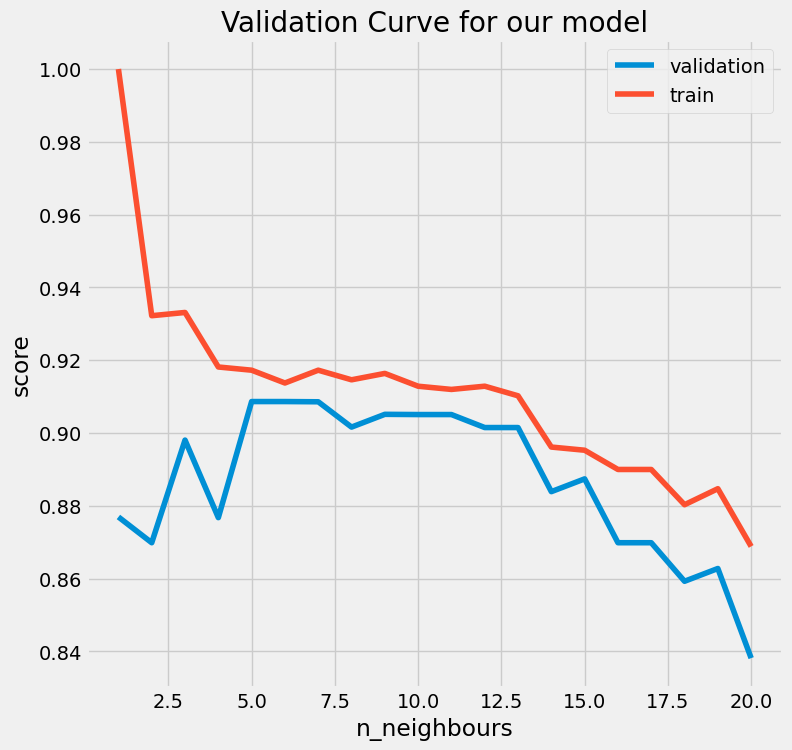

In [76]:
# Choose a range for the test
#
k = np.arange(1, 21) # From 1 to 40

# Initiate the Validation Curve
#
train_score, val_score = validation_curve(knn, x_train_scl, y_train, 
    param_name='n_neighbors', param_range=k, cv=cv)

# Display the VC
#
plt.figure(figsize=(8,8))
plt.title("Validation Curve for our model")
plt.plot(k, val_score.mean(axis=1), label='validation');
plt.plot(k, train_score.mean(axis=1), label='train');

plt.xlabel('n_neighbours')
plt.ylabel('score')
plt.legend()
plt.show()

#### GridSearchCV

*Process of performing hyperparameter tuning in order to determine the optimal values for a given model*  
*Pass params with a dictionnary*

In [77]:
# Create the params' dictionnary
#
params = {'n_neighbors': np.arange(1,11),
               'metric': ['euclidean', 'manhattan']}

# Initiate the function
#
grid = GridSearchCV(knn, params, scoring='accuracy', cv=cv);
grid.fit(x_train_scl, y_train);

In [78]:
# Best Score
#
grid.best_score_

0.9086466165413534

In [79]:
# Best Params
#
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [87]:
# Best Estimator applied on the model
#
model = grid.best_estimator_
print(model)
# Use the model to predict on TestSet
#
model.score(x_test_scl, y_test)

KNeighborsClassifier(metric='euclidean')


0.9137931034482759

#### Confusion Matrix

*Used in classification problems to assess where errors in the model were made.*  
*The rows represent the actual classes the outcomes should have been.*   
*While the columns represent the predictions we have made.*

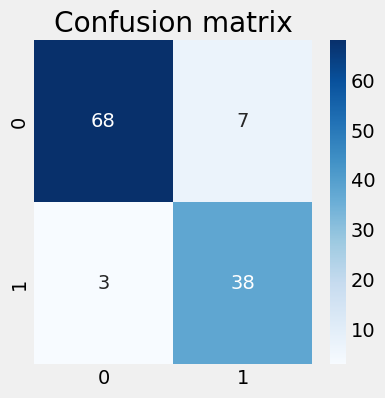

In [81]:
# Initiate the Confusion Matrix
#
cf_matrix = confusion_matrix(y_test, model.predict(x_test_scl))

# Display the CM
#
plt.figure(figsize=(4,4))
plt.title("Confusion matrix")
sns.heatmap(cf_matrix, cmap='Blues', annot=True);
plt.show()

____________________________________
____________________________________

<H2><center>Saving the Model and Params (Label Encoder and Scaler)</center></H2>

In [91]:
# Using Pickle (for OOP) or Joblib (Numpy Array / Big Data)
# Create a file to save it -
# Or Create a dictionnary with : Label Encoder ; Scaler ; Model
# 
param_ml = {
              "Label Encoder": le,
              "Scaler": sc,
              "Model": model
            }

# Use .dump() to save
#
joblib.dump(param_ml, 'model/model_sn_joblib')

{'Label Encoder': LabelEncoder(), 'Scaler': StandardScaler(), 'Model': KNeighborsClassifier(metric='euclidean')}


____________________________________
____________________________________

<H1><center>The End</center></H1>

</br>  
<p style='text-align: right;'><i>+-+-+-+-+ Template by : Charley Lebarbier +-+-+-+-+</i></p>
